# Outcomes

In [2]:
from upDown import UpDown
from randomUpDown import RandomGame
import numpy as np

Upset-Downset is an example of a two player game with perfect information for all (nothing is hideen from either player), there are no ties, and the game will end in a finite number of plays (at most the number of nodes). Because of this, there should exist a way to predict the possible outcomes for each game. In other words, if each player is playing 'optimally' can we tell who is going to win? Let's explore this idea further.

Consider the four games on node size $1$ and $0$. The empty game ($0$ nodes) $G_0$, the game with one green node $G_1$, the game with one red node $R_1$, and the game with one blue node $B_1$.

G_0:


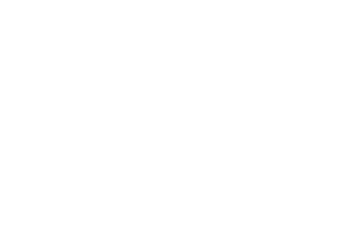

G_1:


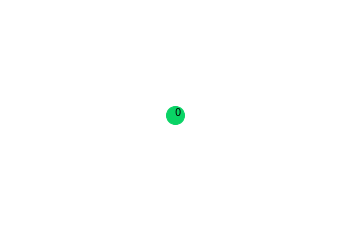

R_0:


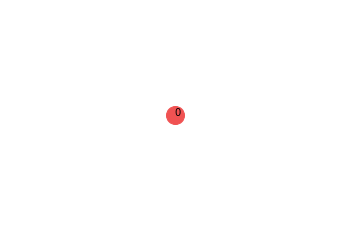

B_0:


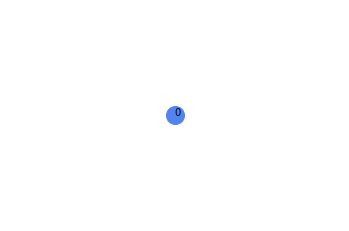

In [3]:
G_0 = UpDown({}); G_1 = UpDown({0:[]}); R_1 = UpDown({0:[]}, coloring={0:-1}); B_1 = UpDown({0:[]}, coloring={0:1})
print('G_0:'); G_0.plot()
print('G_1:'); G_1.plot()
print('R_0:'); R_1.plot()
print('B_0:'); B_1.plot()

Recall that Up can only choose blue or green nodes and Down can only choose red or green nodes. So each or these games, $G_1, G_1, R_1,$ and $B_1$ represent a different outcome. Notice that the player who goes first will lose $G_0$ but win $G_1$, while the Up player will always win $R_1$ and the Down player will always win $B_1$ (no matter which order they go in). It turns out that these our the four possible outcomes if the players are playing optimally: first player win, second player win, Up win, and Down win. Indeed, we can recursively check this!

Suppose we know the outcomes for games of (node) size $n$ or smaller. Let $G$ be of size $n+1$. The game begins

1. If Up starts and there is a node $x$ such that $G-x$ is either a second player win or an Up win AND if 
   if Down starts and there is a node $y$ such that $G-y$ is either a second player win or an Down win, then
   $G$ is a first player win.
   

2. If Up starts and there is not a node $x$ such that $G-x$ is either a second player win or an Up win AND 
   if Down starts and there is not a node $y$ such that $G-y$ is either a second player win or an Down win, then
   $G$ is a second player win.


3. If Up starts and there is a node $x$ such that $G-x$ is either a second player win or an Up win AND 
   if Down starts and there is not a node $y$ such that $G-y$ is either a second player win or an Down win, then
   $G$ is an Up player win.


4. If Up starts and there is not a node $x$ such that $G-x$ is either a second player win or an Up win AND 
   if Down starts and there is a node $y$ such that $G-y$ is either a second player win or an Down win, then
   $G$ is an Down player win.

This is essentially what the method outcome() does on UpDown obects. It will tell you who can win given optimal play. One thing to watch out for is that the string 'Next' refers to a first player win and 'Previous' refers to a second player win. Try it out below!

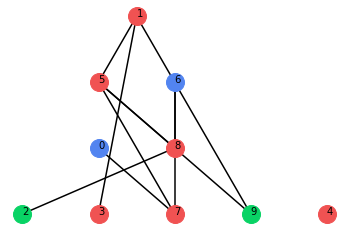

'Down'

In [8]:
n = 10 #try smaller n if you want to work the outcomes out by hand. 
# Beware, increasing n might lead to outcome() running very slowly.
G = RandomGame(n, RGB = np.random.choice([True, False]))
G.plot()
G.outcome()

# Approximating the Outcome

The outcome() method essentially builds a giant recursive tree, and fills in values from the ground level up. In fact, if we had access to this tree, we could even know the best way to play the game. Unfortunately, this tree becomes unmanageable very fast as the size of the game becomes very large. For example, if you play a green game on $20$ nodes with no edges, this recursion tree will have $20! = 2432902008176640000$ nodes. We can cut a few corners to make this algorithm a bit more efficient, but the recursion solution is still far too slow to work with general "large" games.

One approach way to solve this problem is to flip it around. Instead of using an outcome function to learn how to play optimally, we use an optimal player to learn the outcomes. Assume we had an agent $\mathcal{A}$ that could play optimally. We will define optimal play as always winning if you can. We can define the following function $F_{\mathcal{A}}(G,x)\mapsto \{0,1\}$, where $G$ is a game of Upset-Downset and $x$ is either 'Up' or 'Down'. The function represents the two agents playing eachother and returns $1$ if the first player wins the match and $0$ otherwise. 

Now let $\mathrm{Out}(G)\mapsto{-1,0,1,2}$ be the function with $G$ an Upset-Downset game, where it outputs $2$ if $G$ a first player win, $1$ if it is an up win, $0$ if it is a second player win, and $-1$ if it is a down win. It's easy to verify the following identity

$\mathrm{Out}(G) \quad = \quad 2F_{\mathcal{A}}(G,\mathrm{Up})F_{\mathcal{A}}(G,\mathrm{Down})\, +\, F_{\mathcal{A}}(G,\mathrm{Up})\, -\, F_{\mathcal{A}}(G,\mathrm{Down})$

This is solves our recursion problem, because it only requires that we play through the game twice to compute $F_{\mathcal{A}}(G,\mathrm{Up})$ and $F_{\mathcal{A}}(G,\mathrm{Down})$. Unfortunately, we have another problem, we can never know if $\mathcal{A}$ is playing optimally without a proper outcome function. So it will be more honest if we changed our identity to an approximation

$\mathrm{Out}(G) \quad \approx \quad 2F_{\mathcal{A}}(G,\mathrm{Up})F_{\mathcal{A}}(G,\mathrm{Down})\, +\, F_{\mathcal{A}}(G,\mathrm{Up})\, -\, F_{\mathcal{A}}(G,\mathrm{Down})$

However, if $\mathcal{A}$ didn't always play optimally (say mostly optimally), our function $F_{\mathcal{A}}(G,x)$ becomes a random variable, so $\mathrm{Out}(G)$ is as well. As $\mathcal(A)$ approaches optimality the distribution of $F_{\mathcal{A}}(G,x)$ will also approach the correct outcomes, so to will $\mathrm{Out}(G)$.